/tmp/ipykernel_3689932/906363438.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Gender", y="i10index", order=["male", "female"], showfliers=False, palette=palette_Emma)


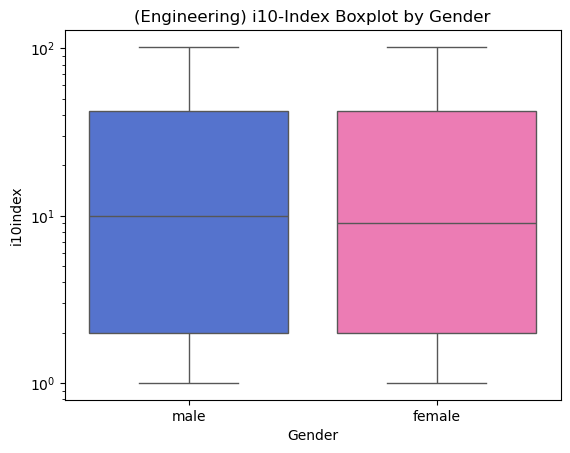

Summary Statistics of i10-index by Gender (Engineering)
            count       mean         std  min  25%  50%   75%      max
Gender                                                                
female   432355.0  40.269417  234.289225  0.0  0.0  2.0  22.0  56865.0
male    3159135.0  48.891097  298.206697  0.0  0.0  2.0  21.0  65945.0


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Engineering_i10_index_with_gender.csv")


df_filtered = df[df["i10index"] > 1e-6]
df_filtered = df_filtered[df_filtered["Gender"] != "unknown"]


palette_Emma = {
    "male": "royalblue",
    "female": "hotpink"
}


sns.boxplot(data=df_filtered, x="Gender", y="i10index", order=["male", "female"], showfliers=False, palette=palette_Emma)
plt.yscale('log')
plt.title("(Engineering) i10-Index Boxplot by Gender")
plt.show()

#print(df.groupby("Gender")["i10index"].describe())
print("Summary Statistics of i10-index by Gender (Engineering)")
print(
    df[df["Gender"].isin(["male", "female"])]
    .groupby("Gender")["i10index"]
    .describe()
)

In [3]:
from scipy.stats import mannwhitneyu

male = df[df["Gender"] == "male"]["i10index"]
female = df[df["Gender"] == "female"]["i10index"]

stat, p = mannwhitneyu(male, female, alternative="two-sided")
print(f"Mann-Whitney U test: U={stat}, p={p}")

Mann-Whitney U test: U=684252076936.0, p=0.035672820285039944


In [4]:
top_10_percent = df[df["i10index"] > df["i10index"].quantile(0.9)]
top_gender_dist = top_10_percent["Gender"].value_counts(normalize=True)
print(top_10_percent)
print(top_gender_dist)

            AuthorId  i10index   Gender  Genderized
0         1995014452        24     male         0.0
1         2002579779        32     male         0.0
2         2250382311       365     male         0.0
5           97662032      6040     male         0.0
6          131295039      1254     male         0.0
...              ...       ...      ...         ...
17035676  3108206617        40  unknown         NaN
17035677  3110475383        40  unknown         NaN
17035685  3107260487        32  unknown         NaN
17035686  3108729064        32  unknown         NaN
17035723  2997064162        33  unknown         NaN

[1700474 rows x 4 columns]
Gender
male       0.467743
unknown    0.467354
female     0.064904
Name: proportion, dtype: float64


In [4]:
overall_dist = df["Gender"].value_counts(normalize=True)
print(overall_dist)


Gender
unknown    0.789180
male       0.185440
female     0.025379
Name: proportion, dtype: float64


In [6]:
import numpy as np


def gini(array):
    array = array[np.isfinite(array)]
    array = np.sort(array)
    n = len(array)
    if n == 0 or np.sum(array) == 0:
        return np.nan
    gini_index = (2 * np.sum((np.arange(1, n + 1) * array))) / (n * np.sum(array)) - (n + 1) / n
    return gini_index

import pandas as pd
for gender in df["Gender"].unique():
    group = df[df["Gender"] == gender]
    gini_score = gini(group["i10index"].values)
    print(f"Gini coefficient for {gender} (i10index): {gini_score:.4f}")
    
overall_gini = gini(df["i10index"].values)
print(f"Overall Gini coefficient (i10index): {overall_gini:.4f}")

Gini coefficient for male (i10index): 0.8910
Gini coefficient for unknown (i10index): 0.9511
Gini coefficient for female (i10index): 0.8741
Overall Gini coefficient (i10index): 0.9458
